--- CARGANDO DATOS ---
Primeras filas del dataset:
         X1        X2  y
0  2.526093  0.321050  0
1  0.366954  0.031462  0
2  0.768219  0.717486  0


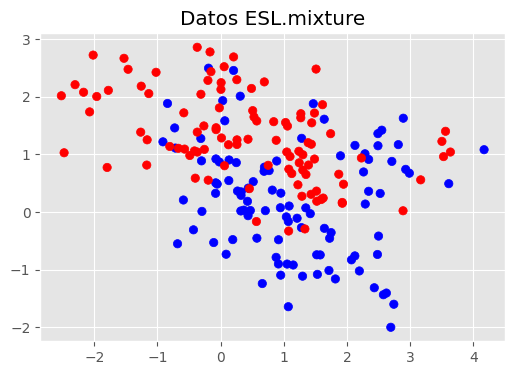


--- ENTRENANDO SVM LINEAL ---


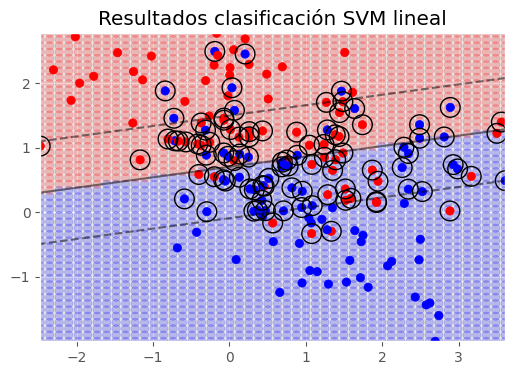

El accuracy de test (Lineal) es: 70.0%

--- ENTRENANDO SVM RADIAL (CON GRID SEARCH) ---
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': np.float64(1.1288378916846884)} : 0.7625203820172374 accuracy


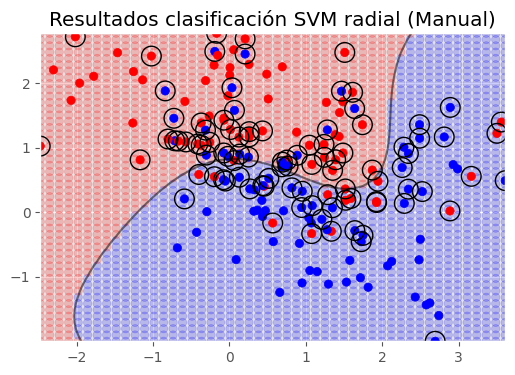

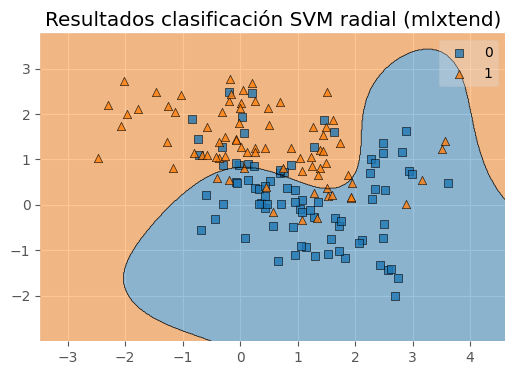

El accuracy de test (Radial) es: 80.0%

Matriz de Confusión (Radial):
Predicción   0   1
Real              
0           14   3
1            5  18


In [1]:

# Jesus Ernesto Estrada Valenzuela IA 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings


plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot')
warnings.filterwarnings('ignore')


print("--- CARGANDO DATOS ---")
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
print("Primeras filas del dataset:")
print(datos.head(3))

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y)
ax.set_title("Datos ESL.mixture")
plt.show()


X = datos.drop(columns = 'y')
y = datos['y']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

print("\n--- ENTRENANDO SVM LINEAL ---")

modelo_lineal = SVC(C = 100, kernel = 'linear', random_state=123)
modelo_lineal.fit(X_train, y_train)


x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y_grid = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X_grid = np.meshgrid(y_grid, x)
grid = np.vstack([X_grid.ravel(), Y.ravel()]).T


pred_grid = modelo_lineal.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)


ax.scatter(
    modelo_lineal.support_vectors_[:, 0],
    modelo_lineal.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black')

ax.contour(
    X_grid,
    Y,
    modelo_lineal.decision_function(grid).reshape(X_grid.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--'])
ax.set_title("Resultados clasificación SVM lineal")
plt.show()


predicciones_lineal = modelo_lineal.predict(X_test)
accuracy_lineal = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_lineal,
            normalize = True
           )
print(f"El accuracy de test (Lineal) es: {100*accuracy_lineal}%")


print("\n--- ENTRENANDO SVM RADIAL (CON GRID SEARCH) ---")


param_grid = {'C': np.logspace(-5, 7, 20)}


grid_search = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3,
        verbose    = 0,
        return_train_score = True
      )

_ = grid_search.fit(X = X_train, y = y_train)


print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_search.best_params_, ":", grid_search.best_score_, grid_search.scoring)

modelo_radial = grid_search.best_estimator_


pred_grid_radial = modelo_radial.predict(grid)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid_radial, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

ax.scatter(
    modelo_radial.support_vectors_[:, 0],
    modelo_radial.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black')


ax.contour(
    X_grid,
    Y,
    modelo_radial.decision_function(grid).reshape(X_grid.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-')
ax.set_title("Resultados clasificación SVM radial (Manual)")
plt.show()


fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo_radial,
    ax = ax)
ax.set_title("Resultados clasificación SVM radial (mlxtend)")
plt.show()


predicciones_radial = modelo_radial.predict(X_test)


accuracy_radial = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_radial,
            normalize = True
           )
print(f"El accuracy de test (Radial) es: {100*accuracy_radial}%")

confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones_radial,
    rownames=['Real'],
    colnames=['Predicción'])

print("\nMatriz de Confusión (Radial):")
print(confusion_matrix)
